In [7]:
#Read data
from src.services.embedding_service import SentenceEmbeddingSimilarity
from src.services import natural_questions_data_service

parser = natural_questions_data_service.NaturalQuestionsParser("./data/Natural-Questions-LLM-responses.csv")
sentenceEmbeddingSimilarity = SentenceEmbeddingSimilarity() 

llm_results = parser.read_llm_results_from_csv()

/Users/imax/Documents/github/llm-hallucinations-detector-framework/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
#convert sentances to embeddings 
for res in llm_results: 
    correct_answ = res.long_answer    
    for k, v in res.llm_answers.items():               
        similarity = sentenceEmbeddingSimilarity.embedding_similarity(correct_answ, v)
        res.long_answer_similarity[k] = similarity
#print the last entity
print(res)

UID: 85c959f5-0e48-4c90-b60e-cff28f9b6ae3
Question: what is the meaning of the name melanesia
Long Answer: <P> The name Melanesia ( in French Mélanésie ) was first used by Jules Dumont d'Urville in 1832 to denote an ethnic and geographical grouping of islands whose inhabitants he thought were distinct from those of Micronesia and Polynesia . </P>
LLM Answers: {'phi3': 'Melanesia refers to a region consisting mainly of islands located south-e end Pacific Ocean, including New Guinea and other nearby islands like Vanuatu, Fiji, and Solomon Islands. The term was coined in reference to their darker skin color compared to Polynesian or Micronesian inhabitants due to ancient migration patterns.', 'llama3.1': 'The term "Melanesia" comes from the Greek words "melan" (black) and "nesos" (island). It was coined by British explorer John Fearn in 1819 to describe a region of island nations in the Pacific Ocean, including Fiji, Solomon Islands, Vanuatu, and New Guinea. The name refers to the dark sk

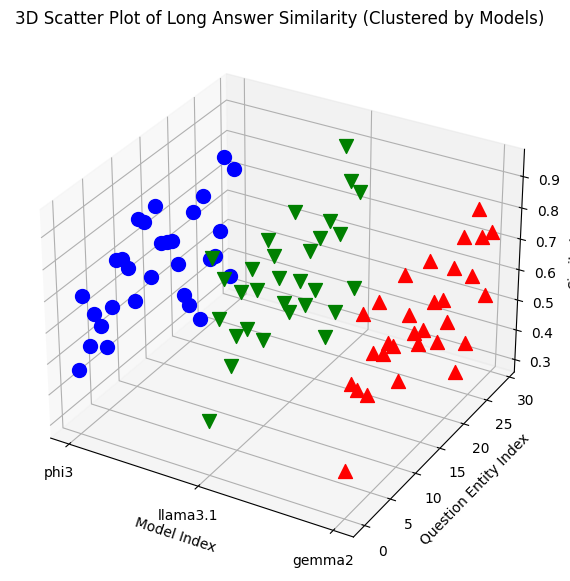

In [9]:
from src.services.plot_service import visualize_similarity_3d_scatter

visualize_similarity_3d_scatter(llm_results)